In [1]:
from RSData import *
from HaiYangData import *
import glob

In [6]:
hyfiles = glob.glob(r'G:\remote_sensing_data\swh\hy2b\ALT\*\*\*.nc')


In [8]:
len(hyfiles)

8713

In [9]:
hyfiles = hyfiles[0:28]

In [10]:


hy_value = ['swh_ku','mean_sea_surface']


hy_alt = HaiYangData(satellite='hy', sensor='alt',resolution=25000)
hy_ori_df = pd.DataFrame(np.column_stack((hy_alt.alt_from_nc_files(hyfiles, value=hy_value))), columns=['lon', 'lat', 'time']+hy_value)

# 删除无效点,只处理北纬66°以上的数据
hy_fill_value = 32767
hy_ori_df = hy_ori_df.drop(list(np.where(hy_ori_df['swh_ku'] == hy_fill_value)[0][:]))
hy_ori_df = hy_alt.data_filter(hy_ori_df,'lat',66)


In [17]:
hy_ori_df = hy_ori_df.drop(hy_ori_df[hy_ori_df.mean_sea_surface > 500].index)

In [19]:
# 将WGS 84坐标（4326）转化为极射投影
crs = CRS.from_epsg(4326)
crs = CRS.from_string("epsg:4326")
crs = CRS.from_proj4("+proj=latlon")
crs = CRS.from_user_input(4326)
crs2 = CRS(proj="aeqd")

transformer = HaiYangData.set_transformer(crs,crs2)
transformer_back = HaiYangData.set_transformer(crs2,crs)

In [20]:
# 将投影数据添加到原始dataframe中
hy_alt.add_proj(hy_ori_df, transformer)

# 交叉点平均化
mean_grid = hy_alt.coincident_point_mean(hy_ori_df,'mean_sea_surface')

# 获得XYmgrid
hy_x_map, hy_y_map = hy_alt.get_map_grid(transformer_back)

<ipython-input-21-fc804d3e40e1>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  hy_m.pcolormesh(hy_x_map, hy_y_map, data=mean_grid, cmap=plt.cm.jet,vmin=0, vmax=60,latlon = True)


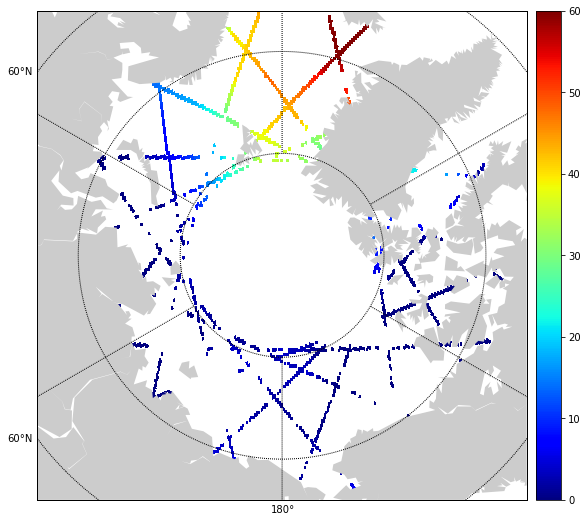

In [21]:
plt.figure(figsize=(16, 9))
hy_m = Basemap(projection='npaeqd', boundinglat=66, lon_0=180, resolution='c')
hy_m.pcolormesh(hy_x_map, hy_y_map, data=mean_grid, cmap=plt.cm.jet,vmin=0, vmax=60,latlon = True)
hy_m.colorbar(location='right')
hy_m.fillcontinents()
hy_m.drawmapboundary()
hy_m.drawparallels(np.arange(-90., 120., 10.), labels=[1, 0, 0, 0])
hy_m.drawmeridians(np.arange(-180., 180., 60.), labels=[0, 0, 0, 1])
# plt.title("HY2B SWH  "+ year+ month)
plt.show()
plt.close()